# convert each results into excel

import pandas as pd

df = pd.read_csv('results/summarized_results_qt1.csv')

# Sort the dataframe

df_sorted = df.drop(columns=['nn_model', 'number_of_clients'])
# Sort the dataframe by skew, dataset, and heterogeneity_class

# Define the order and bold the 'cornflqs' exp_type
exp_type_order = ['fedavg', 'fedprox', 'cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs', 'oracle-centralized']
df_sorted['exp_type'] = pd.Categorical(df_sorted['exp_type'], categories=exp_type_order, ordered=True)
# Add a newline before each occurrence of 'fedavg' in the 'exp_type' column
df_sorted['exp_type'] = df_sorted['exp_type'].apply(lambda x: '\n' + x if x == 'fedavg' else x)
# Sort the dataframe by the defined order
df_sorted = df_sorted.sort_values(['skew', 'dataset', 'heterogeneity_class','exp_type'])
df_sorted.to_excel('results.xlsx', index=False)

In [5]:
df=pd.read_csv('granular_results/noqs.csv')
# Define the order and bold the 'cornflqs' exp_type
df_sorted = df
exp_type_order = ['fedavg', 'fedprox', 'cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs', 'oracle-centralized']
df_sorted['exp_type'] = pd.Categorical(df_sorted['exp_type'], categories=exp_type_order, ordered=True)
df_sorted['exp_type'] = df_sorted['exp_type'].apply(lambda x: '\n' + x if x == 'fedavg' else x)
df_sorted = df_sorted.sort_values(['skew', 'dataset', 'heterogeneity_class','exp_type'])
df_sorted.to_excel('noqs.xlsx', index=False)

In [7]:
df=pd.read_csv('/home/mbenali/Documents/Project/CFL-Evaluation-of-labels-and-quantity-skew/granular_results/qs1.csv')
df_sorted = df
exp_type_order = ['fedavg', 'fedprox', 'cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs', 'oracle-centralized']
df_sorted['exp_type'] = pd.Categorical(df_sorted['exp_type'], categories=exp_type_order, ordered=True)
df_sorted['exp_type'] = df_sorted['exp_type'].apply(lambda x: '\n' + x if x == 'fedavg' else x)
df_sorted = df_sorted.sort_values(['skew', 'dataset', 'heterogeneity_class','exp_type'])
df_sorted.to_excel('qs1.xlsx', index=False)


In [ ]:
df=pd.read_csv('granular_results/qs2.csv')
#Define the order and bold the 'cornflqs' exp_type
exp_type_order = ['fedavg', 'fedprox', 'cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs', 'oracle-centralized']
df_sorted = df
df_sorted['exp_type'] = pd.Categorical(df_sorted['exp_type'], categories=exp_type_order, ordered=True)
df_sorted['exp_type'] = df_sorted['exp_type'].apply(lambda x: '\n' + x if x == 'fedavg' else x)
df_sorted = df_sorted.sort_values(['skew', 'dataset', 'heterogeneity_class','exp_type'])
df_sorted.to_excel('qs2.xlsx', index=False)

In [82]:
df.columns


Index(['exp_type', 'params', 'nn_model', 'number_of_clients', 'dataset',
       'num_clusters', 'heterogeneity_class', 'skew', 'accuracy', 'ARI', 'AMI',
       'hom', 'cmplt', 'vm', 'seed'],
      dtype='object')

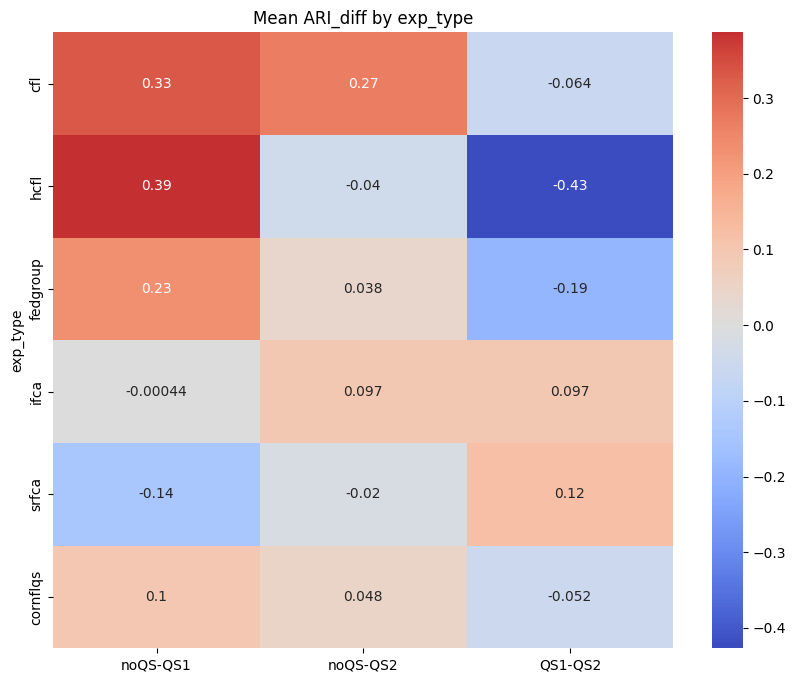

In [79]:
df = pd.read_csv('results/summarized_results.csv')
df['skew'].unique()    
df.fillna('None', inplace=True)
df.columns
df_noQS = df[['exp_type', 'dataset', 'skew', 'ARI','seed']][df['skew'] == 'None']
df_QS1 = df[['exp_type', 'dataset', 'skew', 'ARI','seed']][df['skew'] == 'quantity-skew-type-1']
df_QS2 = df[['exp_type', 'dataset', 'skew', 'ARI','seed']][df['skew'] == 'quantity-skew-type-2']

# Merge df_noQS and df_QS1
df_noQS_QS1 = pd.merge(df_noQS, df_QS1, on=['exp_type', 'dataset', 'seed'], suffixes=('_noQS', '_QS1'))

# Merge df_noQS and df_QS2
df_noQS_QS2 = pd.merge(df_noQS, df_QS2, on=['exp_type', 'dataset', 'seed'], suffixes=('_noQS', '_QS2'))

# Merge df_QS1 and df_QS2
df_QS1_QS2 = pd.merge(df_QS1, df_QS2, on=['exp_type', 'dataset', 'seed'], suffixes=('_QS1', '_QS2'))
# Ensure ARI_QS1 and ARI_noQS are numeric
df_noQS_QS1['ARI_QS1'] = pd.to_numeric(df_noQS_QS1['ARI_QS1'], errors='coerce')
df_noQS_QS1['ARI_noQS'] = pd.to_numeric(df_noQS_QS1['ARI_noQS'], errors='coerce')

# Add ARI_diff column to each merged dataframe
df_noQS_QS1['ARI_diff'] = df_noQS_QS1['ARI_noQS'] - df_noQS_QS1['ARI_QS1']

# Ensure ARI_QS2 and ARI_noQS are numeric
df_noQS_QS2['ARI_QS2'] = pd.to_numeric(df_noQS_QS2['ARI_QS2'], errors='coerce')
df_noQS_QS2['ARI_noQS'] = pd.to_numeric(df_noQS_QS2['ARI_noQS'], errors='coerce')

# Add ARI_diff column to each merged dataframe
df_noQS_QS2['ARI_diff'] = df_noQS_QS2['ARI_noQS'] - df_noQS_QS2['ARI_QS2']

# Ensure ARI_QS1 and ARI_QS2 are numeric
df_QS1_QS2['ARI_QS1'] = pd.to_numeric(df_QS1_QS2['ARI_QS1'], errors='coerce')
df_QS1_QS2['ARI_QS2'] = pd.to_numeric(df_QS1_QS2['ARI_QS2'], errors='coerce')

# Add ARI_diff column to each merged dataframe
df_QS1_QS2['ARI_diff'] = df_QS1_QS2['ARI_QS1'] - df_QS1_QS2['ARI_QS2']
import seaborn as sns
import matplotlib.pyplot as plt

# Group by exp_type and calculate the mean of ARI_diff for each dataframe
mean_ari_diff_noQS_QS1 = df_noQS_QS1.groupby('exp_type')['ARI_diff'].mean()
mean_ari_diff_noQS_QS2 = df_noQS_QS2.groupby('exp_type')['ARI_diff'].mean()
mean_ari_diff_QS1_QS2 = df_QS1_QS2.groupby('exp_type')['ARI_diff'].mean()

# Create a dataframe for the heatmap
heatmap_data = pd.DataFrame({
    'noQS-QS1': mean_ari_diff_noQS_QS1,
    'noQS-QS2': mean_ari_diff_noQS_QS2,
    'QS1-QS2': mean_ari_diff_QS1_QS2
}).reset_index()

# Set the index to exp_type
heatmap_data.set_index('exp_type', inplace=True)

# Reorder the rows as specified
heatmap_data = heatmap_data.loc[['cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title('Mean ARI_diff by exp_type')
plt.show()




In [90]:
df['accuracy'][0].split()


['71.88', '\\pm', '11.83']

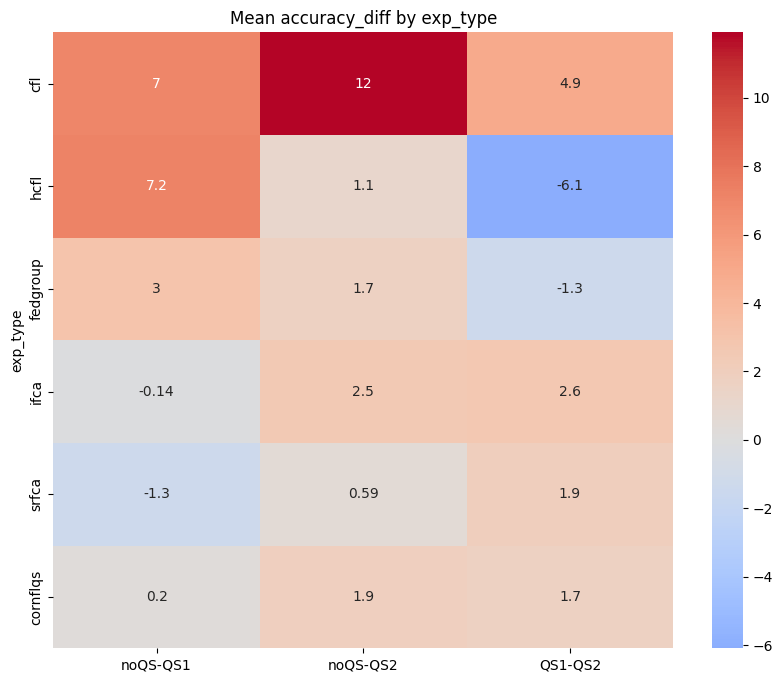

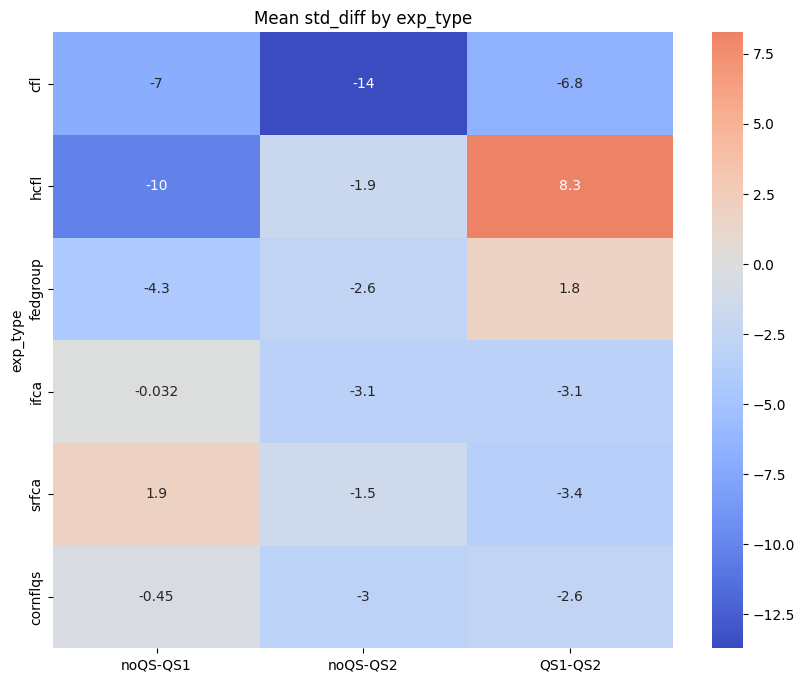

In [93]:
df = pd.read_csv('results/summarized_results.csv')
df['skew'].unique()    
df.fillna('None', inplace=True)
df.columns
df['std'] = df['accuracy'].str.split().str[2].astype(float)
df['accuracy'] = df['accuracy'].str.split().str[0].astype(float)
df_noQS = df[['exp_type', 'dataset', 'skew', 'accuracy', 'std', 'seed']][df['skew'] == 'None']
df_QS1 = df[['exp_type', 'dataset', 'skew', 'accuracy', 'std', 'seed']][df['skew'] == 'quantity-skew-type-1']
df_QS2 = df[['exp_type', 'dataset', 'skew', 'accuracy', 'std', 'seed']][df['skew'] == 'quantity-skew-type-2']

# Merge df_noQS and df_QS1
df_noQS_QS1 = pd.merge(df_noQS, df_QS1, on=['exp_type', 'dataset', 'seed'], suffixes=('_noQS', '_QS1'))

# Merge df_noQS and df_QS2
df_noQS_QS2 = pd.merge(df_noQS, df_QS2, on=['exp_type', 'dataset', 'seed'], suffixes=('_noQS', '_QS2'))

# Merge df_QS1 and df_QS2
df_QS1_QS2 = pd.merge(df_QS1, df_QS2, on=['exp_type', 'dataset', 'seed'], suffixes=('_QS1', '_QS2'))

# Ensure accuracy_QS1 and accuracy_noQS are numeric
df_noQS_QS1['accuracy_QS1'] = pd.to_numeric(df_noQS_QS1['accuracy_QS1'], errors='coerce')
df_noQS_QS1['accuracy_noQS'] = pd.to_numeric(df_noQS_QS1['accuracy_noQS'], errors='coerce')

# Add accuracy_diff column to each merged dataframe
df_noQS_QS1['accuracy_diff'] = df_noQS_QS1['accuracy_noQS'] - df_noQS_QS1['accuracy_QS1']

# Ensure accuracy_QS2 and accuracy_noQS are numeric
df_noQS_QS2['accuracy_QS2'] = pd.to_numeric(df_noQS_QS2['accuracy_QS2'], errors='coerce')
df_noQS_QS2['accuracy_noQS'] = pd.to_numeric(df_noQS_QS2['accuracy_noQS'], errors='coerce')

# Add accuracy_diff column to each merged dataframe
df_noQS_QS2['accuracy_diff'] = df_noQS_QS2['accuracy_noQS'] - df_noQS_QS2['accuracy_QS2']

# Ensure accuracy_QS1 and accuracy_QS2 are numeric
df_QS1_QS2['accuracy_QS1'] = pd.to_numeric(df_QS1_QS2['accuracy_QS1'], errors='coerce')
df_QS1_QS2['accuracy_QS2'] = pd.to_numeric(df_QS1_QS2['accuracy_QS2'], errors='coerce')

# Add accuracy_diff column to each merged dataframe
df_QS1_QS2['accuracy_diff'] = df_QS1_QS2['accuracy_QS1'] - df_QS1_QS2['accuracy_QS2']

# Ensure std_QS1 and std_noQS are numeric
df_noQS_QS1['std_QS1'] = pd.to_numeric(df_noQS_QS1['std_QS1'], errors='coerce')
df_noQS_QS1['std_noQS'] = pd.to_numeric(df_noQS_QS1['std_noQS'], errors='coerce')

# Add std_diff column to each merged dataframe
df_noQS_QS1['std_diff'] = df_noQS_QS1['std_noQS'] - df_noQS_QS1['std_QS1']

# Ensure std_QS2 and std_noQS are numeric
df_noQS_QS2['std_QS2'] = pd.to_numeric(df_noQS_QS2['std_QS2'], errors='coerce')
df_noQS_QS2['std_noQS'] = pd.to_numeric(df_noQS_QS2['std_noQS'], errors='coerce')

# Add std_diff column to each merged dataframe
df_noQS_QS2['std_diff'] = df_noQS_QS2['std_noQS'] - df_noQS_QS2['std_QS2']

# Ensure std_QS1 and std_QS2 are numeric
df_QS1_QS2['std_QS1'] = pd.to_numeric(df_QS1_QS2['std_QS1'], errors='coerce')
df_QS1_QS2['std_QS2'] = pd.to_numeric(df_QS1_QS2['std_QS2'], errors='coerce')

# Add std_diff column to each merged dataframe
df_QS1_QS2['std_diff'] = df_QS1_QS2['std_QS1'] - df_QS1_QS2['std_QS2']

import seaborn as sns
import matplotlib.pyplot as plt

# Group by exp_type and calculate the mean of accuracy_diff and std_diff for each dataframe
mean_accuracy_diff_noQS_QS1 = df_noQS_QS1.groupby('exp_type')['accuracy_diff'].mean()
mean_accuracy_diff_noQS_QS2 = df_noQS_QS2.groupby('exp_type')['accuracy_diff'].mean()
mean_accuracy_diff_QS1_QS2 = df_QS1_QS2.groupby('exp_type')['accuracy_diff'].mean()

mean_std_diff_noQS_QS1 = df_noQS_QS1.groupby('exp_type')['std_diff'].mean()
mean_std_diff_noQS_QS2 = df_noQS_QS2.groupby('exp_type')['std_diff'].mean()
mean_std_diff_QS1_QS2 = df_QS1_QS2.groupby('exp_type')['std_diff'].mean()

# Create dataframes for the heatmaps
heatmap_data_accuracy = pd.DataFrame({
    'noQS-QS1': mean_accuracy_diff_noQS_QS1,
    'noQS-QS2': mean_accuracy_diff_noQS_QS2,
    'QS1-QS2': mean_accuracy_diff_QS1_QS2
}).reset_index()

heatmap_data_std = pd.DataFrame({
    'noQS-QS1': mean_std_diff_noQS_QS1,
    'noQS-QS2': mean_std_diff_noQS_QS2,
    'QS1-QS2': mean_std_diff_QS1_QS2
}).reset_index()

# Set the index to exp_type
heatmap_data_accuracy.set_index('exp_type', inplace=True)
heatmap_data_std.set_index('exp_type', inplace=True)

# Reorder the rows as specified
heatmap_data_accuracy = heatmap_data_accuracy.loc[['cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs']]
heatmap_data_std = heatmap_data_std.loc[['cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs']]

# Plot the heatmap for accuracy
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_accuracy, annot=True, cmap='coolwarm', center=0)
plt.title('Mean accuracy_diff by exp_type')
plt.show()

# Plot the heatmap for std
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_std, annot=True, cmap='coolwarm', center=0)
plt.title('Mean std_diff by exp_type')
plt.show()


# calculate ranking 

In [ ]:
def algo_ranking(dataset=None, skew=None, heterogeneity_class=None):
    import pandas as pd
    #Load the CSV data into a pandas DataFrame
    df = pd.read_csv('results/summarized_results.csv')
    if skew == 'quantity-skew-type-1' : 
        df = pd.read_csv('granular_results/qs1.csv')
        df.rename(columns={'global_accuracy': 'accuracy', 'homogeneity': 'hom', 'completeness': 'cmplt', 'v_measure': 'vm'}, inplace=True)
        granular_metrics = ['class_1_qt-skew_0.05', 'class_2_qt-skew_0.05', 'class_3_qt-skew_0.05', 'class_4_qt-skew_0.05',
                         'class_1_qt-skew_0.2', 'class_2_qt-skew_0.2', 'class_3_qt-skew_0.2', 'class_4_qt-skew_0.2',
                         'class_1_qt-skew_1', 'class_2_qt-skew_1', 'class_3_qt-skew_1', 'class_4_qt-skew_1',
                         'class_1_qt-skew_2', 'class_2_qt-skew_2', 'class_3_qt-skew_2', 'class_4_qt-skew_2']
        for metric in granular_metrics:
            df[metric] = df[metric].str.split(' ').str[0].astype(float)
        
    elif skew == 'quantity-skew-type-2' : 
        df = pd.read_csv('granular_results/qs2.csv')
        df.rename(columns={'global_accuracy': 'accuracy', 'homogeneity': 'hom', 'completeness': 'cmplt', 'v_measure': 'vm'}, inplace=True)
        granular_metrics= ['class_1_qt-skew_0.05', 'class_4_qt-skew_0.2', 'class_2_qt-skew_1', 'class_3_qt-skew_2']
        
        for metric in granular_metrics:
            df[metric] = df[metric].str.split(' ').str[0].astype(float)
     
    metrics = ['accuracy', 'ARI', 'AMI', 'hom', 'cmplt', 'vm']
    
    df.fillna('None', inplace=True)
    df = df[df['exp_type'] != 'oracle-centralized']
    df['exp_type'] = df['exp_type'] + '_' + df['params']
    
      
    #Filter the dataframe based on the input parameters
    if dataset:
        df = df[df['dataset'] == dataset]
    if skew:
        if skew == 'None':
            df = df[df['skew'] == skew]
        elif skew == 'quantity-skew':
            df = df[df['skew'] != 'None']
        else:
            df = df[df['skew'] == skew]
    if heterogeneity_class:
        df = df[df['heterogeneity_class'] == heterogeneity_class]

      #Step 2: Clean the data
    # Remove the '\pm' and uncertainty values from the 'accuracy' column
    df['accuracy'] = df['accuracy'].str.split(' ').str[0].astype(float)
    # Replace 'n/a' with NaN for missing values

    # Convert metric columns to numeric

    
    df[metrics] = df[metrics].apply(pd.to_numeric, errors='coerce')
    
    # Concatenate 'dataset', 'heterogeneity_class', and 'skew' into one column named 'group'
    df['group'] = df['dataset'] + '_' + df['heterogeneity_class'] + '_' + df['skew'] + '_' + df['seed'].astype(str)
    # Drop the original 'dataset', 'heterogeneity_class', and 'skew' columns
    df = df.drop(columns=['dataset', 'heterogeneity_class', 'skew', 'seed'])

    # Step 3: Group the data by the new 'group' column
    grouped = df.groupby('group')

    # Step 4: Rank algorithms within each group for each metric
    def rank_algorithms(group):
        for metric in metrics:
            group[f'{metric}_rank'] = group[metric].rank(ascending=False, method='min')
        return group

    ranked_groups = grouped.apply(rank_algorithms)
    best = ranked_groups.groupby('exp_type')[[f'{metric}_rank' for metric in metrics]].mean()
    best = best.sort_values(by='accuracy_rank')

    # Calculate the average accuracy for each exp_type
    avg_accuracy = ranked_groups.groupby('exp_type')['accuracy'].mean()
    std_accuracy = ranked_groups.groupby('exp_type')['accuracy'].std()
    best['avg_accuracy'] = avg_accuracy
    best['std_accuracy'] = std_accuracy
    avg_ARI = ranked_groups.groupby('exp_type')['ARI'].mean()
    best['avg_ARI'] = avg_ARI
    # Calculate the average for each granular metric for each exp_type
    if skew in ['quantity-skew-type-1', 'quantity-skew-type-2']:
        for metric in granular_metrics:
            avg_metric = ranked_groups.groupby('exp_type')[metric].mean()
            best[f'{metric}'] = avg_metric
            # Reorder the columns
    best = best[['accuracy_rank', 'avg_accuracy','std_accuracy', 'ARI_rank', 'avg_ARI', 'AMI_rank', 'hom_rank', 'cmplt_rank', 'vm_rank']]
    return best


In [25]:
from openpyxl.styles import Font

result = algo_ranking()
results_qt1 = algo_ranking(skew='quantity-skew-type-1')
results_qst2 = algo_ranking(skew='quantity-skew-type-2')
results_noqs = algo_ranking(skew='None')

from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Border, Side

# Load the existing workbook
wb = load_workbook('Results.xlsx')

# Create a new sheet
ws = wb.create_sheet(title='Global_results')

# Function to write a dataframe to the worksheet with formatting
def write_dataframe_to_sheet(ws, df, start_row):
    thin_border = Border(left=Side(style='thin'), right=Side(style='thin'), top=Side(style='thin'), bottom=Side(style='thin'))
    for r_idx, row in enumerate(dataframe_to_rows(df.round(2), index=True, header=True), start_row):
        for c_idx, value in enumerate(row, 1):
            cell = ws.cell(row=r_idx, column=c_idx, value=value)
            cell.border = thin_border
            # Bold the first exp_type and underline the second
            if r_idx == start_row + 1:
                cell.font = Font(bold=True)
            elif r_idx == start_row + 2:
                cell.font = Font(bold=True)    
            elif r_idx == start_row + 3:
                cell.font = Font(underline='single')
    return r_idx + 2  # Add an extra line between tables

# Write the first title and results
ws.append(['Global_ranking'])
ws.cell(row=ws.max_row, column=1).font = Font(bold=True)
start_row = write_dataframe_to_sheet(ws, result, ws.max_row + 1)

# Write the fourth title and results
ws.append(['No Quantity Skew'])
ws.cell(row=ws.max_row, column=1).font = Font(bold=True)
write_dataframe_to_sheet(ws, results_noqs, ws.max_row + 1)

# Write the second title and results
ws.append(['Quantity skew type 1'])
ws.cell(row=ws.max_row, column=1).font = Font(bold=True)
start_row = write_dataframe_to_sheet(ws, results_qt1, ws.max_row + 1)

# Write the third title and results
ws.append(['Quantity skew type 2'])
ws.cell(row=ws.max_row, column=1).font = Font(bold=True)
start_row = write_dataframe_to_sheet(ws, results_qst2, ws.max_row + 1)

# Auto-adjust column widths
for col in ws.columns:
    max_length = 0
    column = col[0].column_letter  # Get the column name
    for cell in col:
        try:
            if len(str(cell.value)) > max_length:
                max_length = len(cell.value)
        except:
            pass
    adjusted_width = (max_length + 2)
    ws.column_dimensions[column].width = adjusted_width

# Save the workbook
wb.save('Results.xlsx')


In [2]:
from utils_results import granular_results
granular_results("results/")

In [3]:
from utils_results import main_excel
main_excel()

Excel file created successfully!


# EXP CSV generation

In [ ]:
import pandas as pd
import itertools

# Define the list of tuples for exp_type and params
exp_params_list = [
    ('fedavg', 'None'),
    ('fedprox', 0.1),
    ('cfl', 'None'),
    ('hcfl', 'euclidean'),
    ('fedgroup', 'edc'),
    ('ifca', 'best'),
    ('srfca', 'None'),
    ('cornflqs', '1-10-10'),
    ('cornflqs', '10-1-10'),
    ('cornflqs', '1-1-20'),
    ('oracle-centralized', 'clustering')
]

# Define the base data
base_data = [
    ['mnist', 'concept-shift-on-features', 'quantity-skew-type-2'],
    ['mnist', 'concept-shift-on-labels', 'quantity-skew-type-2'],
    ['mnist', 'features-distribution-skew', 'quantity-skew-type-2'],
    ['fashion-mnist', 'concept-shift-on-features', 'quantity-skew-type-2'],
    ['fashion-mnist', 'concept-shift-on-labels', 'quantity-skew-type-2'],
    ['fashion-mnist', 'features-distribution-skew', 'quantity-skew-type-2'],
    ['kmnist', 'concept-shift-on-features', 'quantity-skew-type-2'],
    ['kmnist', 'concept-shift-on-labels', 'quantity-skew-type-2'],
    ['kmnist', 'features-distribution-skew', 'quantity-skew-type-2']
]

# Define fixed parameters
nn_model = 'linear'
number_of_clients = 100
num_samples_by_label = 50
num_clusters = 4
default_epochs = 10
rounds = 20
# Define the seed values
seed_values = [42, 43, 44, 45, 46]

# Create a list to store all the combinations
all_combinations = []

# Generate all combinations of base_data, exp_params_list, and seed_values
for base, (exp_type, params), seed in itertools.product(base_data, exp_params_list, seed_values):
    epochs = 100 if exp_type == 'oracle-centralized' else default_epochs
    combination = base + [exp_type, params, seed, nn_model, number_of_clients, num_samples_by_label, num_clusters, epochs, rounds]
    all_combinations.append(combination)

# Convert the list of combinations to a DataFrame
columns = ['dataset', 'heterogeneity_class', 'skew', 'exp_type', 'params', 'seed', 'nn_model', 'number_of_clients', 'num_samples_by_label', 'num_clusters', 'epochs', 'rounds']
df_combinations = pd.DataFrame(all_combinations, columns=columns)

# Reorder the columns as specified
df_combinations = df_combinations[['exp_type', 'params', 'dataset', 'nn_model', 'heterogeneity_class', 'skew', 'number_of_clients', 'num_samples_by_label', 'num_clusters', 'epochs', 'rounds', 'seed']]

# Save the DataFrame to a CSV file
df_combinations.to_csv('exp_configs.csv', index=False)

# TISSUEMNIST

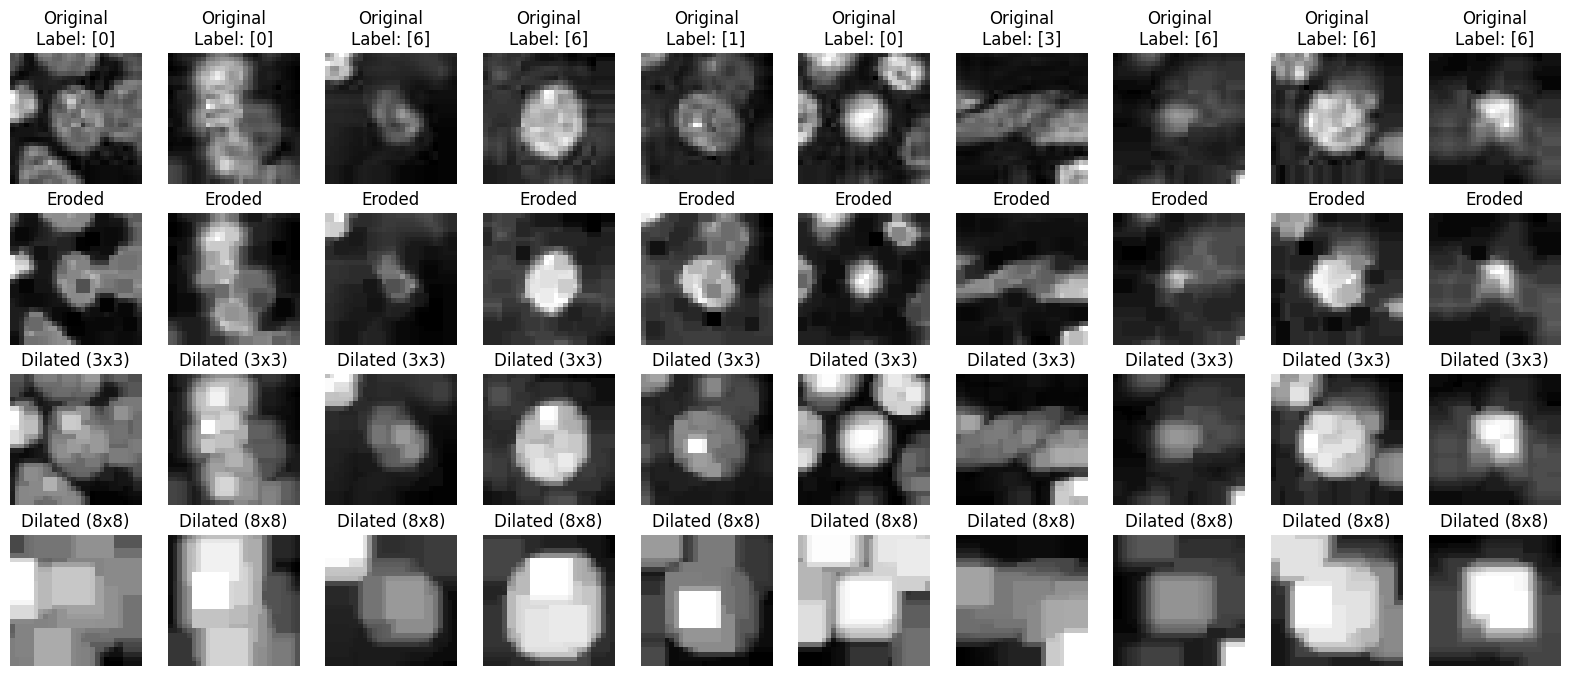

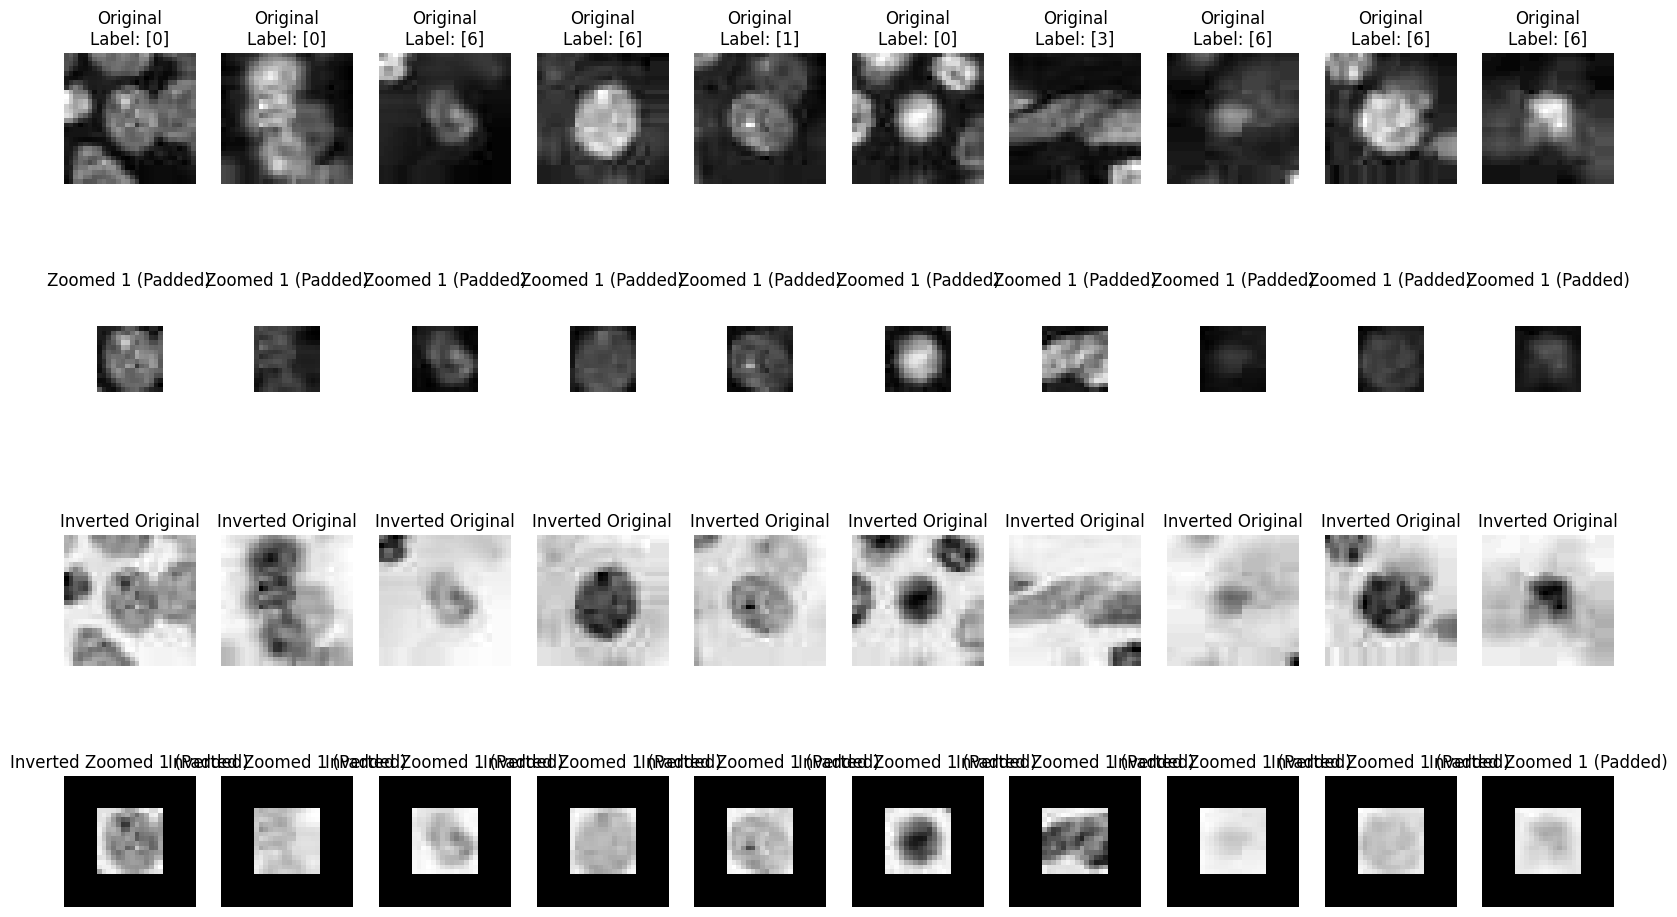

In [1]:
'''
Possible data_flag values from medmnist:
 'pathmnist', 'chestmnist', 'dermamnist', 'octmnist', 'pneumoniamnist', 
 'retinamnist', 'breastmnist', 'bloodmnist', 'tissuemnist', 'organamnist', 
 'organcmnist', 'organmnist3d', 'nodulemnist3d', 'adrenalmnist3d', 'fracturemnist3d', 
 'vesselmnist3d', 'synapsemnist3d'

2D datasets of interest - Data Modality 	Tasks (# Classes/Labels) 	# Samples 	# Training / Validation / Test
PathMNIST 	Colon Pathology 	Multi-Class (9) 	107,180 	89,996 / 10,004 / 7,180
OCTMNIST 	Retinal OCT 	Multi-Class (4) 	109,309 	97,477 / 10,832 / 1,000
TissueMNIST 	Kidney Cortex Microscope 	Multi-Class (8) 	236,386 	165,466 / 23,640 / 47,280

'''
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import os
import medmnist
from medmnist import INFO, Evaluator

data_flag = 'tissuemnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
if os.path.exists('datasets/pathmnist.npz'):
    download = False
else:
    download = True
# load the data
train_dataset = DataClass(root='datasets', split='train', transform=data_transform, download=download)
test_dataset = DataClass(root='datasets', split='val', transform=data_transform, download=download)

pil_dataset = DataClass(root='datasets', split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

import cv2
import matplotlib.pyplot as plt

# Function to plot images with erosion and dilation
def plot_images_with_morphology(train_dataset, n_images=10):
    fig, axes = plt.subplots(4, n_images, figsize=(20, 8))
    kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    kernel_8x8 = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    
    for i in range(n_images):
        image, label = train_dataset[i]
        image_np = image.numpy().squeeze()  # Convert to numpy array and remove channel dimension if grayscale
        
        # Apply erosion and dilation
        eroded_image = cv2.erode(image_np, kernel_3x3, iterations=1)
        dilated_image = cv2.dilate(image_np, kernel_3x3, iterations=1)
        dilated_image_2 = cv2.dilate(image_np, kernel_8x8, iterations=1)
        
        # Plot original image
        axes[0, i].imshow(image_np, cmap='gray')
        axes[0, i].set_title(f'Original\nLabel: {label}')
        axes[0, i].axis('off')
        
        # Plot eroded image
        axes[1, i].imshow(eroded_image, cmap='gray')
        axes[1, i].set_title('Eroded')
        axes[1, i].axis('off')
        
        # Plot dilated image
        axes[2, i].imshow(dilated_image, cmap='gray')
        axes[2, i].set_title('Dilated (3x3)')
        axes[2, i].axis('off')
        
        # Plot dilated image with 8x8 kernel
        axes[3, i].imshow(dilated_image_2, cmap='gray')
        axes[3, i].set_title('Dilated (8x8)')
        axes[3, i].axis('off')
    
    plt.show()

# Plot the first 10 images from the TissueMNIST dataset with morphology operations
plot_images_with_morphology(train_dataset, n_images=10)

import cv2
import matplotlib.pyplot as plt

# Function to plot images with different granularities of zoom
def plot_images_with_zoom(train_dataset, n_images=10):
    fig, axes = plt.subplots(4, n_images, figsize=(20, 12))
    
    for i in range(n_images):
        image, label = train_dataset[i]
        image_np = image.numpy().squeeze()  # Convert to numpy array and remove channel dimension if grayscale
        
        # Zoom into the center of the image with different granularities
        h, w = image_np.shape
        zoomed_image_1 = cv2.resize(image_np[h//4:3*h//4, w//4:3*w//4], (14, 14), interpolation=cv2.INTER_LINEAR)
        
        # Add zero padding to make it 28x28
        zoomed_image_1_padded = np.pad(zoomed_image_1, ((7, 7), (7, 7)), mode='constant', constant_values=0)
        
        # Invert grayscale values of the original image
        inverted_image = 255 - image_np

        # Invert grayscale values of zoomed_image_1_padded
        inverted_zoomed_image_2 = 255 - zoomed_image_1_padded
        
        # Plot original image
        axes[0, i].imshow(image_np, cmap='gray')
        axes[0, i].set_title(f'Original\nLabel: {label}')
        axes[0, i].axis('off')
        
        # Plot zoomed images with zero padding
        axes[1, i].imshow(zoomed_image_1_padded, cmap='gray')
        axes[1, i].set_title('Zoomed 1 (Padded)')
        axes[1, i].axis('off')
        
        axes[2, i].imshow(inverted_image, cmap='gray')
        axes[2, i].set_title('Inverted Original')
        axes[2, i].axis('off')
        
        # Plot inverted zoomed_image_2
        axes[3, i].imshow(inverted_zoomed_image_2, cmap='gray')
        axes[3, i].set_title('Inverted Zoomed 1 (Padded)')
        axes[3, i].axis('off')
    
    plt.show()

# Plot the first 10 images from the TissueMNIST dataset with different granularities of zoom
plot_images_with_zoom(train_dataset, n_images=10)



# PathMNIST

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

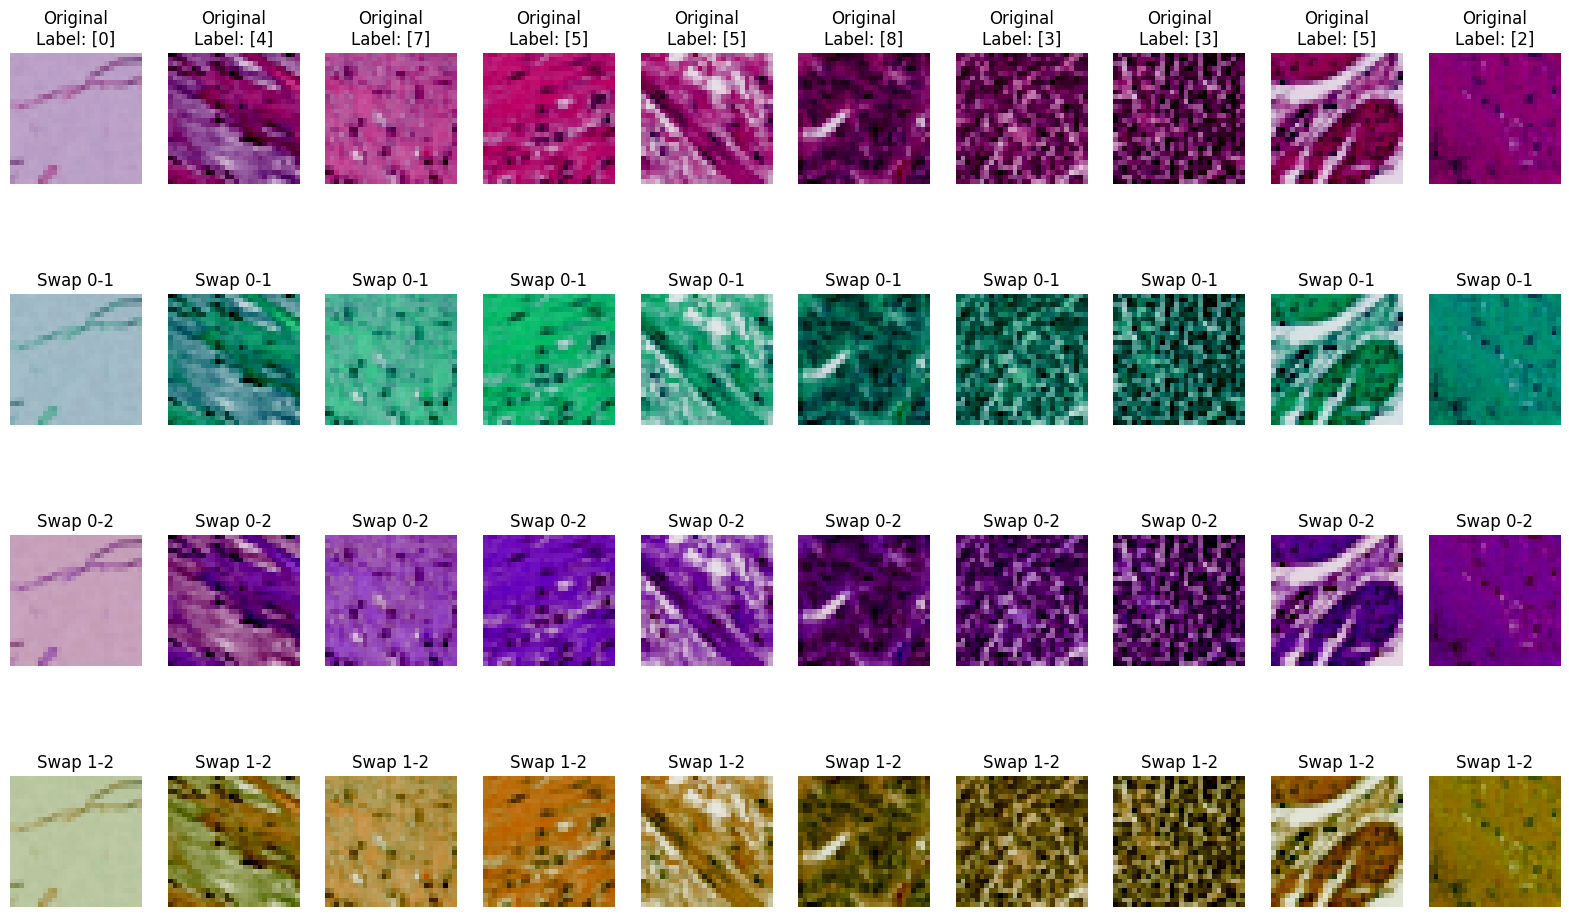

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

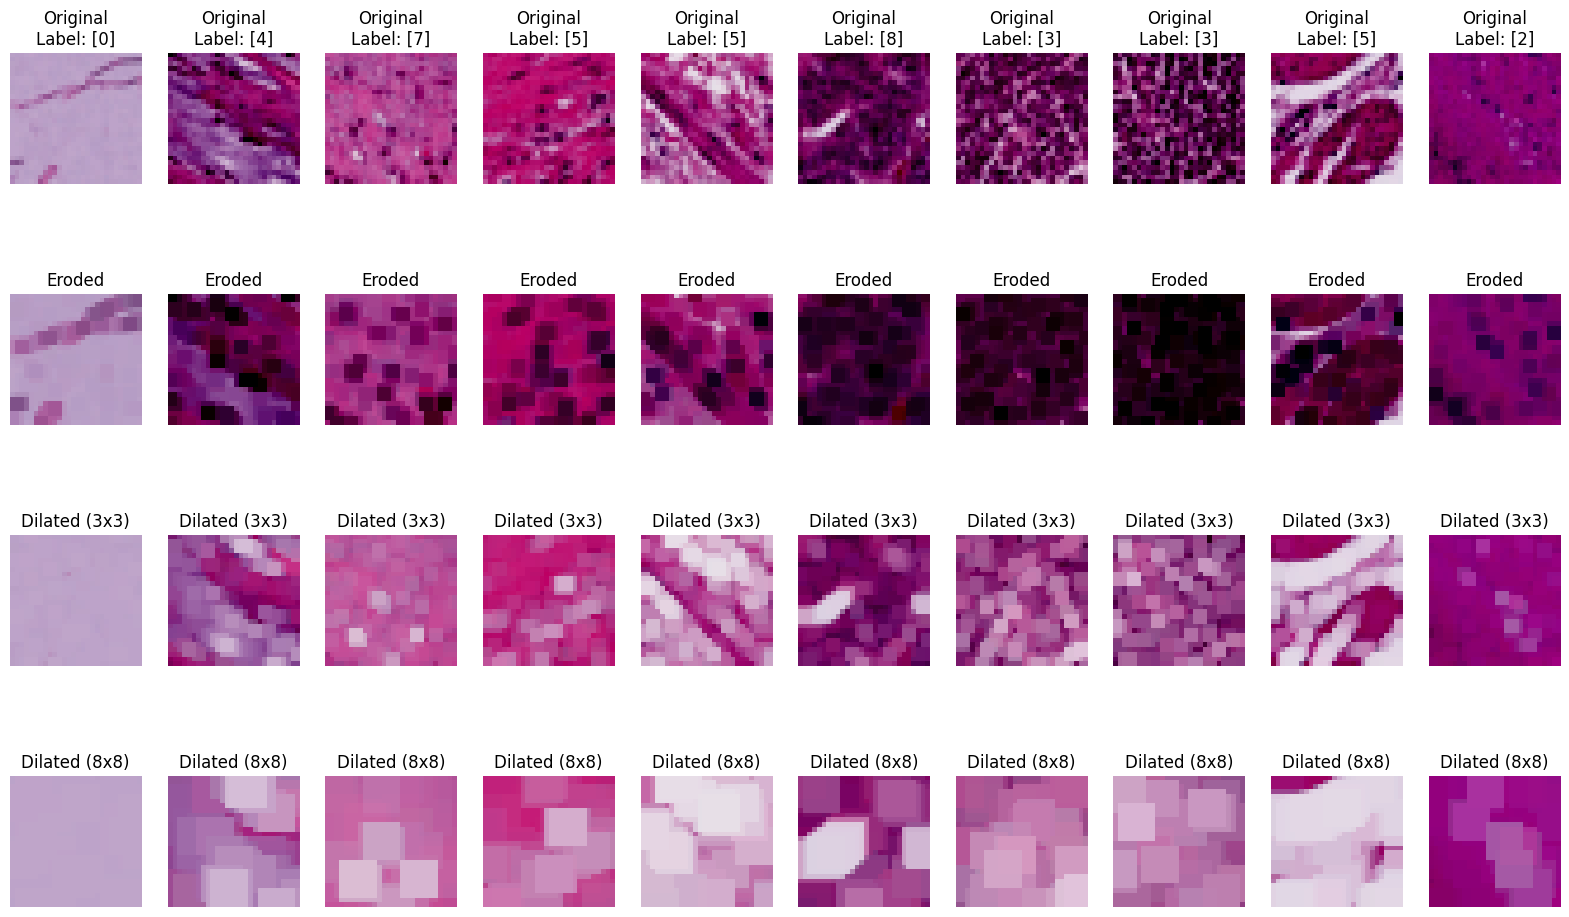

In [12]:
'''
Possible data_flag values from medmnist:
 'pathmnist', 'chestmnist', 'dermamnist', 'octmnist', 'pneumoniamnist', 
 'retinamnist', 'breastmnist', 'bloodmnist', 'tissuemnist', 'organamnist', 
 'organcmnist', 'organmnist3d', 'nodulemnist3d', 'adrenalmnist3d', 'fracturemnist3d', 
 'vesselmnist3d', 'synapsemnist3d'

2D datasets of interest - Data Modality 	Tasks (# Classes/Labels) 	# Samples 	# Training / Validation / Test
PathMNIST 	Colon Pathology 	Multi-Class (9) 	107,180 	89,996 / 10,004 / 7,180
OCTMNIST 	Retinal OCT 	Multi-Class (4) 	109,309 	97,477 / 10,832 / 1,000
TissueMNIST 	Kidney Cortex Microscope 	Multi-Class (8) 	236,386 	165,466 / 23,640 / 47,280

'''
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import os
import medmnist
from medmnist import INFO, Evaluator

data_flag = 'pathmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
if os.path.exists('datasets/pathmnist.npz'):
    download = False
else:
    download = True
# load the data
train_dataset = DataClass(root='datasets', split='train', transform=data_transform, download=download)
test_dataset = DataClass(root='datasets', split='val', transform=data_transform, download=download)

pil_dataset = DataClass(root='datasets', split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
import cv2
import matplotlib.pyplot as plt

# Function to plot images with different channel swapping
def plot_images_with_channel_swapping(train_dataset, n_images=10):
    fig, axes = plt.subplots(4, n_images, figsize=(20, 12))
    
    for i in range(n_images):
        image, label = train_dataset[i]
        image_np = image.numpy().transpose((1, 2, 0))  # Convert to numpy array and change channel order to (H, W, C)
        
        # Channel swapping
        swap_1 = image_np[:, :, [1, 0, 2]]  # Swap channels 0 and 1
        swap_2 = image_np[:, :, [2, 1, 0]]  # Swap channels 0 and 2
        swap_3 = image_np[:, :, [0, 2, 1]]  # Swap channels 1 and 2
        
        # Plot original image
        axes[0, i].imshow(image_np)
        axes[0, i].set_title(f'Original\nLabel: {label}')
        axes[0, i].axis('off')
        
        # Plot channel swapped images
        axes[1, i].imshow(swap_1)
        axes[1, i].set_title('Swap 0-1')
        axes[1, i].axis('off')
        
        axes[2, i].imshow(swap_2)
        axes[2, i].set_title('Swap 0-2')
        axes[2, i].axis('off')
        
        axes[3, i].imshow(swap_3)
        axes[3, i].set_title('Swap 1-2')
        axes[3, i].axis('off')
    
    plt.show()

# Plot the first 10 images from the PathMNIST dataset with different channel swapping
plot_images_with_channel_swapping(train_dataset, n_images=10)

# Function to plot images with erosion and dilation
def plot_images_with_morphology(train_dataset, n_images=10):
    fig, axes = plt.subplots(4, n_images, figsize=(20, 12))
    kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    kernel_8x8 = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    
    for i in range(n_images):
        image, label = train_dataset[i]
        image_np = image.numpy().transpose((1, 2, 0))  # Convert to numpy array and change channel order to (H, W, C)
        
        # Convert to grayscale for morphology operations
        image_gray =  image_np
        
        # Apply erosion and dilation
        eroded_image = cv2.erode(image_gray, kernel_3x3, iterations=1)
        dilated_image = cv2.dilate(image_gray, kernel_3x3, iterations=1)
        dilated_image_2 = cv2.dilate(image_gray, kernel_8x8, iterations=1)
        
        # Plot original image
        axes[0, i].imshow(image_np)
        axes[0, i].set_title(f'Original\nLabel: {label}')
        axes[0, i].axis('off')
        
        # Plot eroded image
        axes[1, i].imshow(eroded_image)
        axes[1, i].set_title('Eroded')
        axes[1, i].axis('off')
        
        # Plot dilated image
        axes[2, i].imshow(dilated_image)
        axes[2, i].set_title('Dilated (3x3)')
        axes[2, i].axis('off')
        
        # Plot dilated image with 8x8 kernel
        axes[3, i].imshow(dilated_image_2)
        axes[3, i].set_title('Dilated (8x8)')
        axes[3, i].axis('off')
    
    plt.show()

# Plot the first 10 images from the TissueMNIST dataset with morphology operations
plot_images_with_morphology(train_dataset, n_images=10)



# OCTMNIST

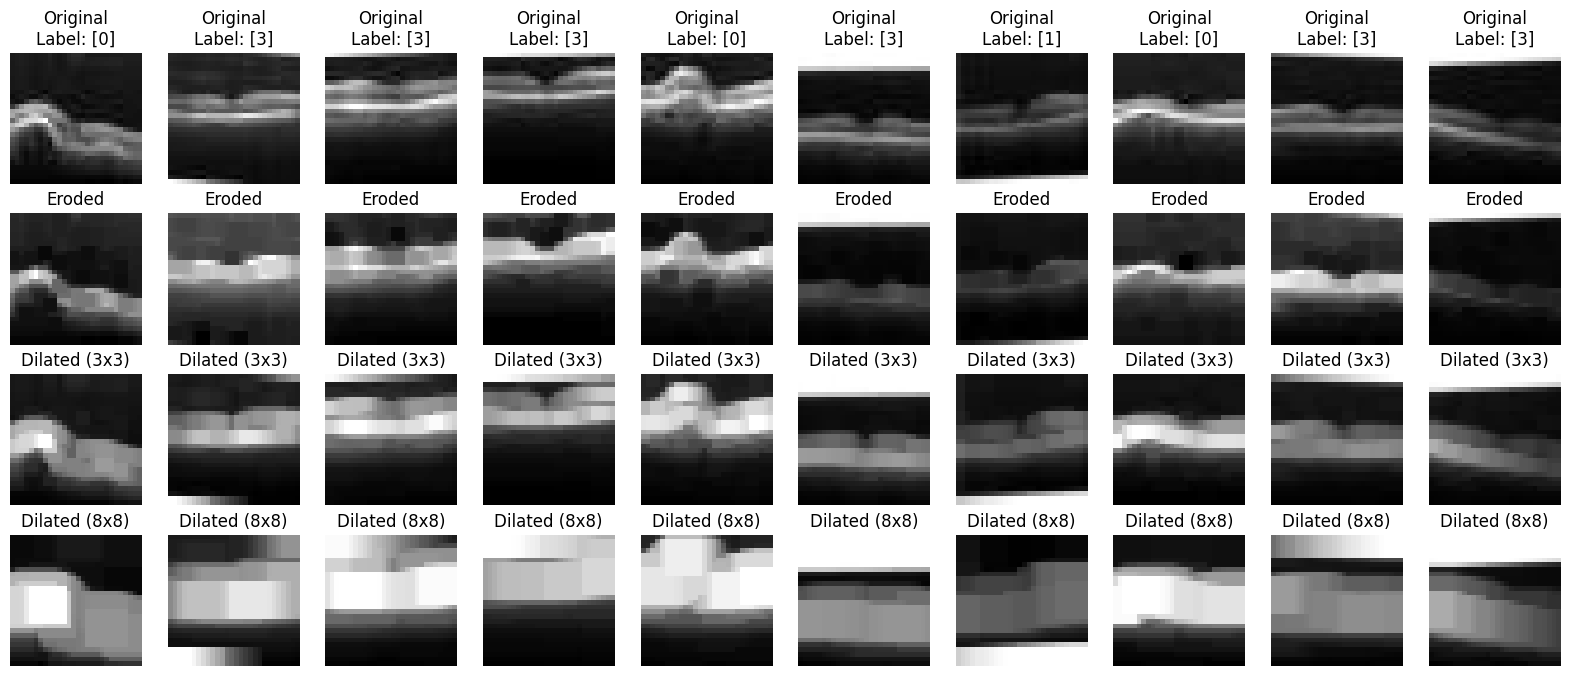

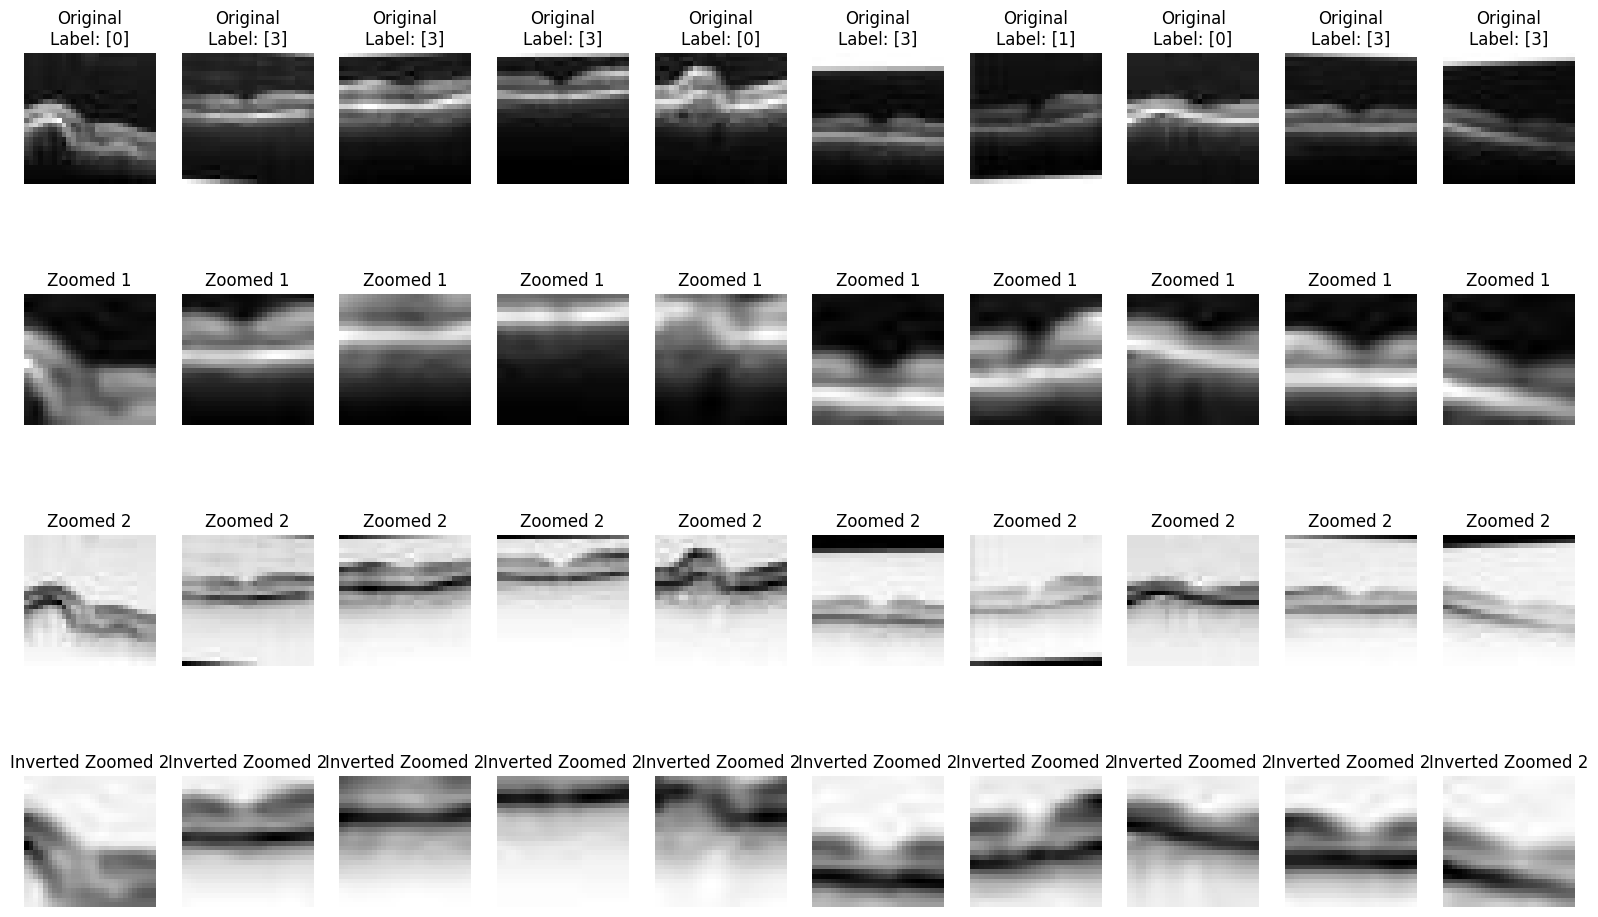

In [ ]:
'''
Possible data_flag values from medmnist:
 'pathmnist', 'chestmnist', 'dermamnist', 'octmnist', 'pneumoniamnist', 
 'retinamnist', 'breastmnist', 'bloodmnist', 'tissuemnist', 'organamnist', 
 'organcmnist', 'organmnist3d', 'nodulemnist3d', 'adrenalmnist3d', 'fracturemnist3d', 
 'vesselmnist3d', 'synapsemnist3d'

2D datasets of interest - Data Modality 	Tasks (# Classes/Labels) 	# Samples 	# Training / Validation / Test
PathMNIST 	Colon Pathology 	Multi-Class (9) 	107,180 	89,996 / 10,004 / 7,180
OCTMNIST 	Retinal OCT 	Multi-Class (4) 	109,309 	97,477 / 10,832 / 1,000
TissueMNIST 	Kidney Cortex Microscope 	Multi-Class (8) 	236,386 	165,466 / 23,640 / 47,280

'''
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import os
import medmnist
from medmnist import INFO, Evaluator

data_flag = 'octmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
if os.path.exists('datasets/pathmnist.npz'):
    download = False
else:
    download = True
# load the data
train_dataset = DataClass(root='datasets', split='train', transform=data_transform, download=download)
test_dataset = DataClass(root='datasets', split='val', transform=data_transform, download=download)

pil_dataset = DataClass(root='datasets', split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

import cv2
import matplotlib.pyplot as plt

# Function to plot images with erosion and dilation
def plot_images_with_morphology(train_dataset, n_images=10):
    fig, axes = plt.subplots(4, n_images, figsize=(20, 8))
    kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    kernel_8x8 = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    
    for i in range(n_images):
        image, label = train_dataset[i]
        image_np = image.numpy().squeeze()  # Convert to numpy array and remove channel dimension if grayscale
        
        # Apply erosion and dilation
        eroded_image = cv2.erode(image_np, kernel_3x3, iterations=1)
        dilated_image = cv2.dilate(image_np, kernel_3x3, iterations=1)
        dilated_image_2 = cv2.dilate(image_np, kernel_8x8, iterations=1)
        
        # Plot original image
        axes[0, i].imshow(image_np, cmap='gray')
        axes[0, i].set_title(f'Original\nLabel: {label}')
        axes[0, i].axis('off')
        
        # Plot eroded image
        axes[1, i].imshow(eroded_image, cmap='gray')
        axes[1, i].set_title('Eroded')
        axes[1, i].axis('off')
        
        # Plot dilated image
        axes[2, i].imshow(dilated_image, cmap='gray')
        axes[2, i].set_title('Dilated (3x3)')
        axes[2, i].axis('off')
        
        # Plot dilated image with 8x8 kernel
        axes[3, i].imshow(dilated_image_2, cmap='gray')
        axes[3, i].set_title('Dilated (8x8)')
        axes[3, i].axis('off')
    
    plt.show()

# Plot the first 10 images from the TissueMNIST dataset with morphology operations
plot_images_with_morphology(train_dataset, n_images=10)

import cv2
import matplotlib.pyplot as plt

# Function to plot images with different granularities of zoom
def plot_images_with_zoom(train_dataset, n_images=10):
    fig, axes = plt.subplots(4, n_images, figsize=(20, 12))
    
    for i in range(n_images):
        image, label = train_dataset[i]
        image_np = image.numpy().squeeze()  # Convert to numpy array and remove channel dimension if grayscale
        
        # Zoom into the center of the image with different granularities
        h, w = image_np.shape
        zoomed_image_1 = cv2.resize(image_np[h//4:3*h//4, w//4:3*w//4], (28, 28), interpolation=cv2.INTER_LINEAR)
        
        # Invert grayscale values of zoomed_image_2
        inverted_image = 255-image_np

        inverted_zoomed_image_2 = 255 - zoomed_image_1
        
        # Plot original image
        axes[0, i].imshow(image_np, cmap='gray')
        axes[0, i].set_title(f'Original\nLabel: {label}')
        axes[0, i].axis('off')
        
        # Add zero padding to zoomed_image_1 to make it 28x28
        padded_zoomed_image_1 = np.pad(zoomed_image_1, ((7, 7), (7, 7)), mode='constant', constant_values=0)
        axes[1, i].imshow(padded_zoomed_image_1, cmap='gray')
        axes[1, i].set_title('Zoomed 1 (Padded)')
        axes[1, i].axis('off')
        
        # Add zero padding to inverted_image to make it 28x28
        axes[2, i].imshow(inverted_image, cmap='gray')
        axes[2, i].set_title('Zoomed 2 (Padded)')
        axes[2, i].axis('off')
        
        # Add zero padding to inverted_zoomed_image_2 to make it 28x28
        padded_inverted_zoomed_image_2 = np.pad(inverted_zoomed_image_2, ((7, 7), (7, 7)), mode='constant', constant_values=0)
        axes[3, i].imshow(padded_inverted_zoomed_image_2, cmap='gray')
        axes[3, i].set_title('Inverted Zoomed 2 (Padded)')
        axes[3, i].axis('off')
    plt.show()

# Plot the first 10 images from the TissueMNIST dataset with different granularities of zoom
plot_images_with_zoom(train_dataset, n_images=10)



# Ploting tracking

In [50]:
server_side_client_cluster_id, client_side_client_cluster_id = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0], [0, 0 , 0, 0, 1, 0, 0, 1, 1, 0]
matches = sum(1 for a, b in zip(server_side_client_cluster_id, client_side_client_cluster_id) if a == b)
match_percentage = (matches / len(server_side_client_cluster_id)) * 100
print(match_percentage == 80)

True


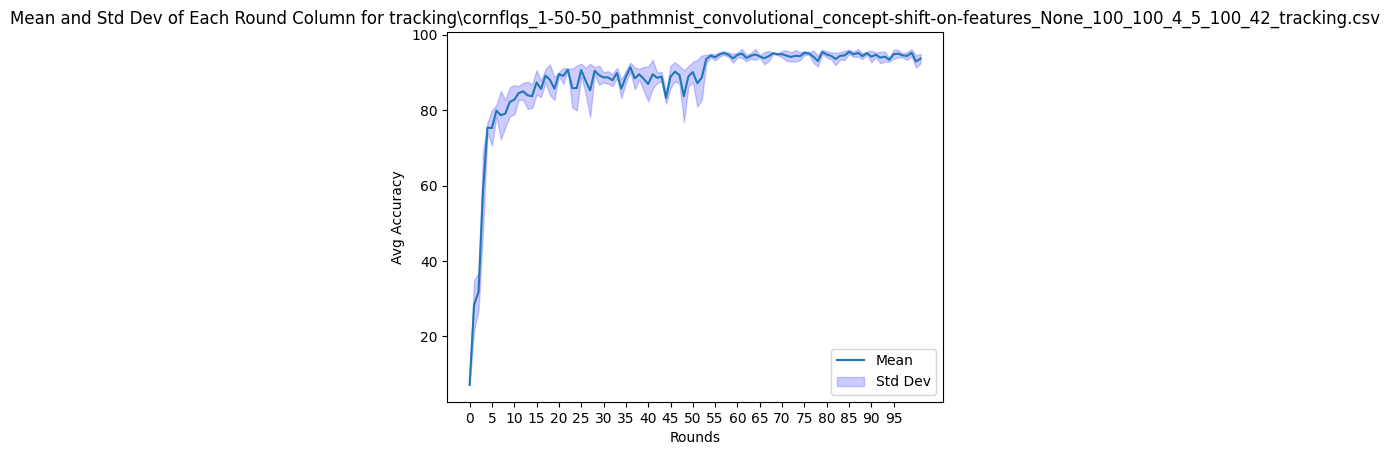

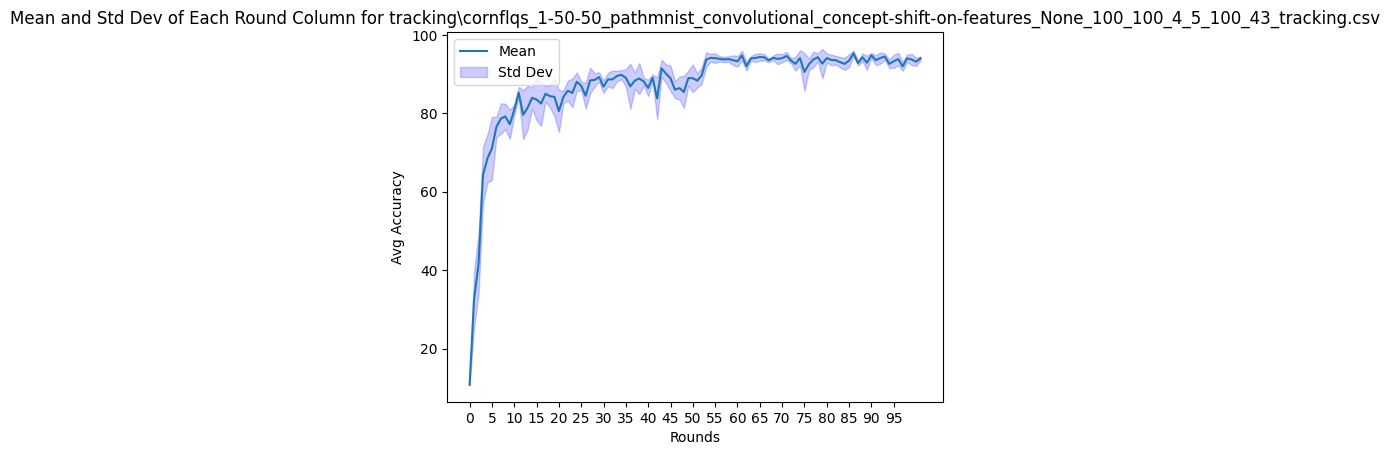

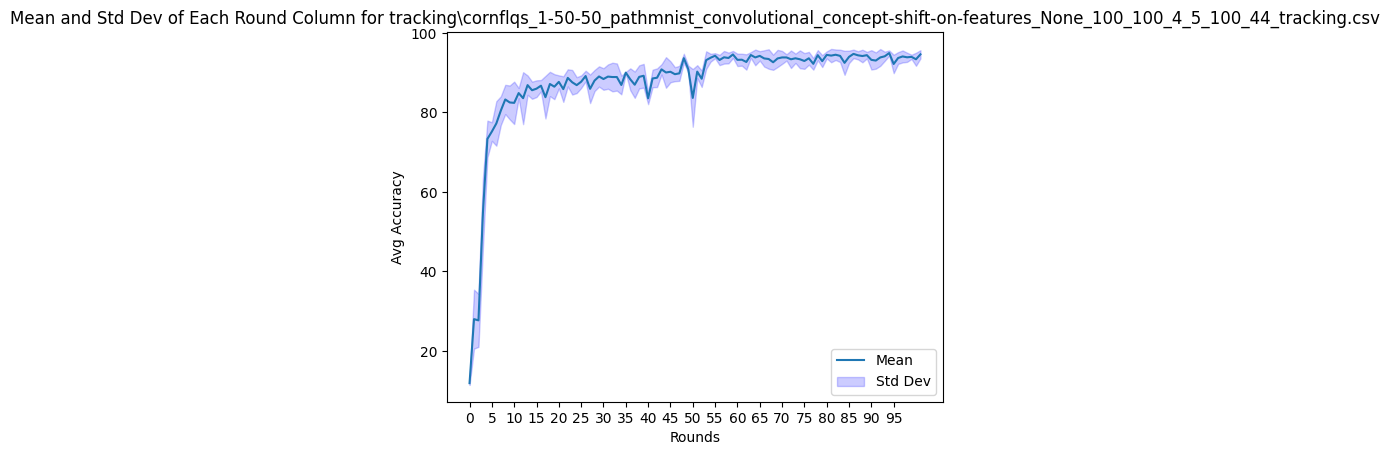

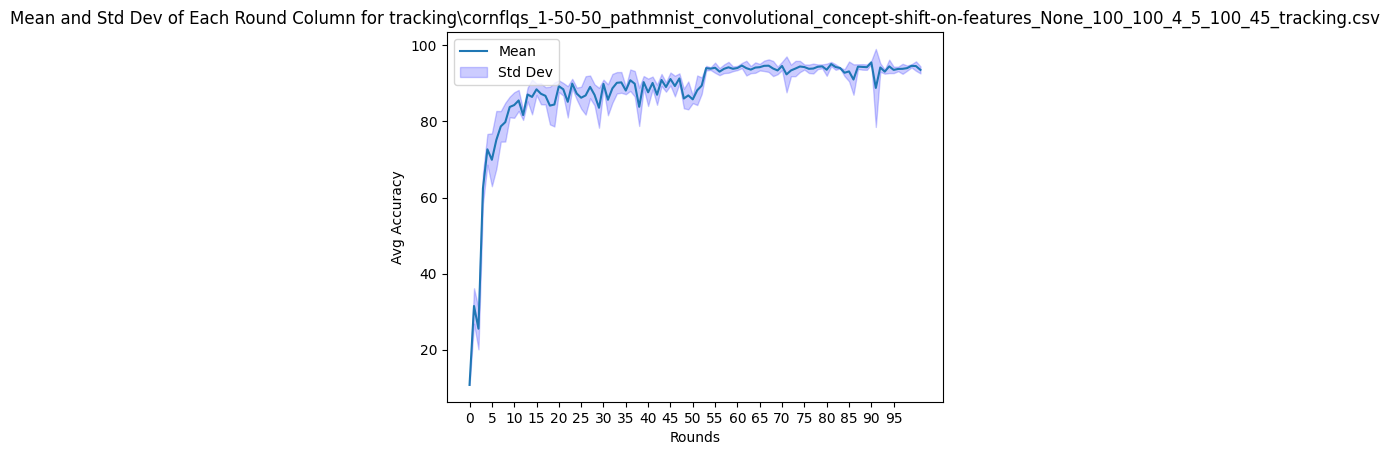

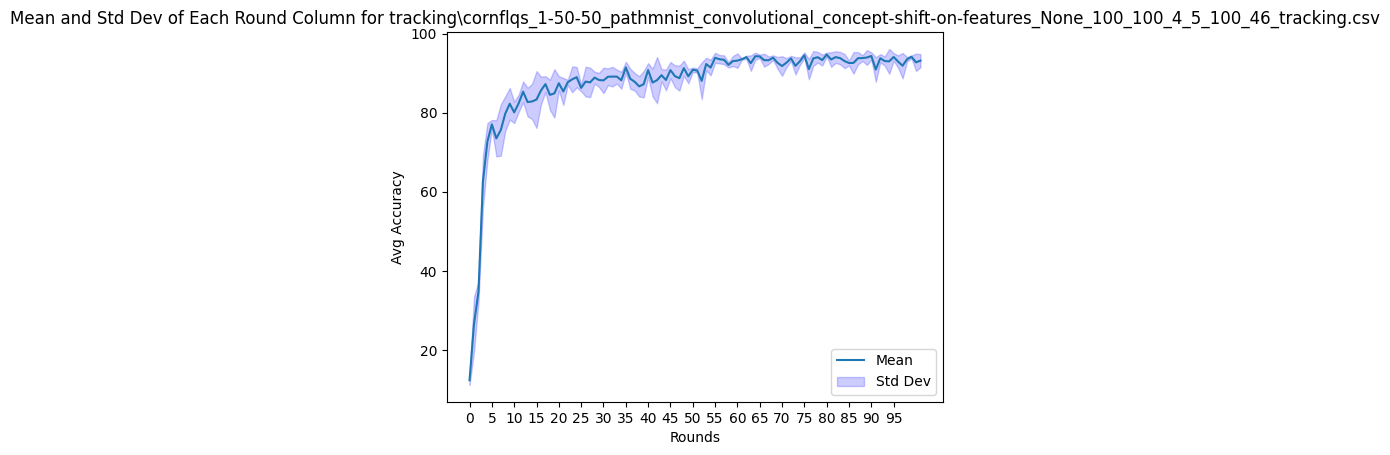

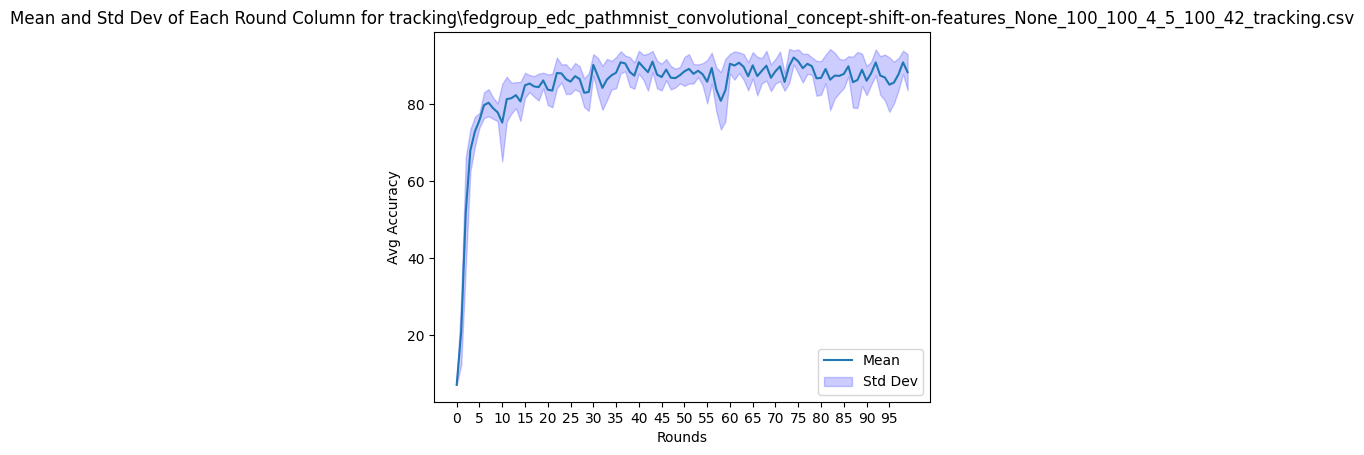

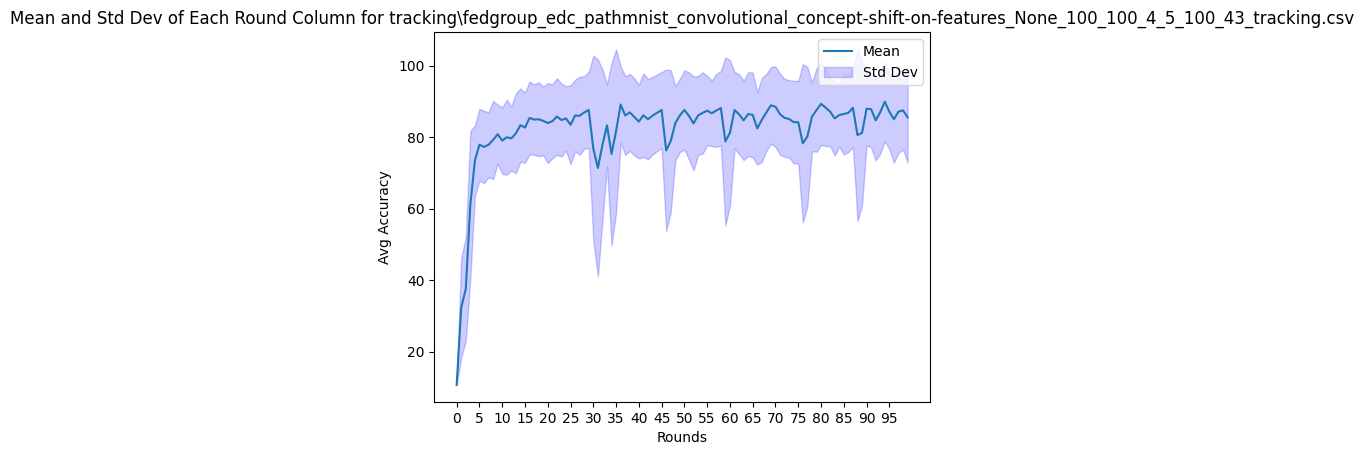

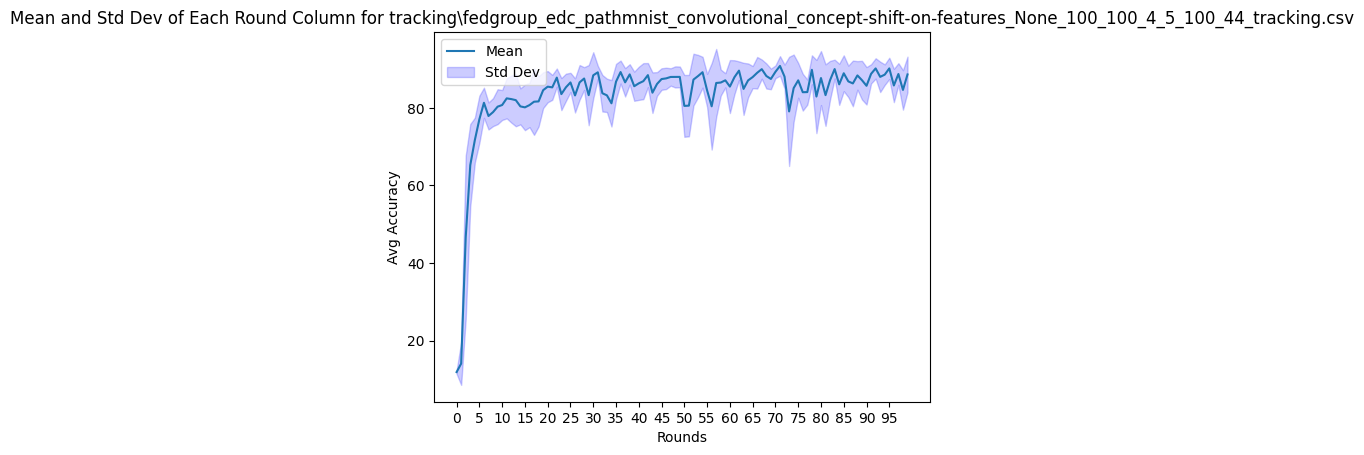

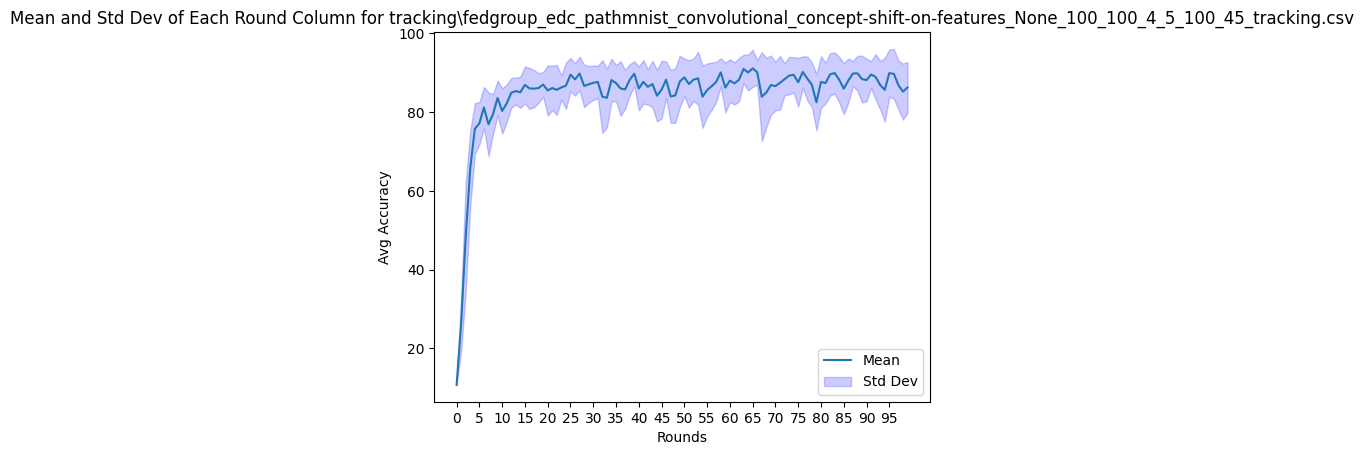

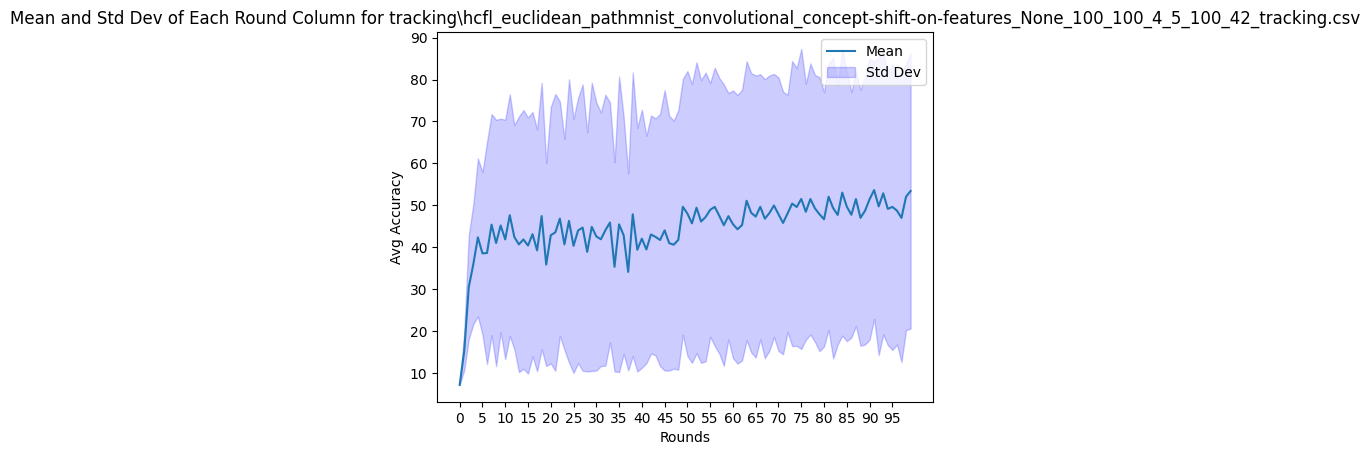

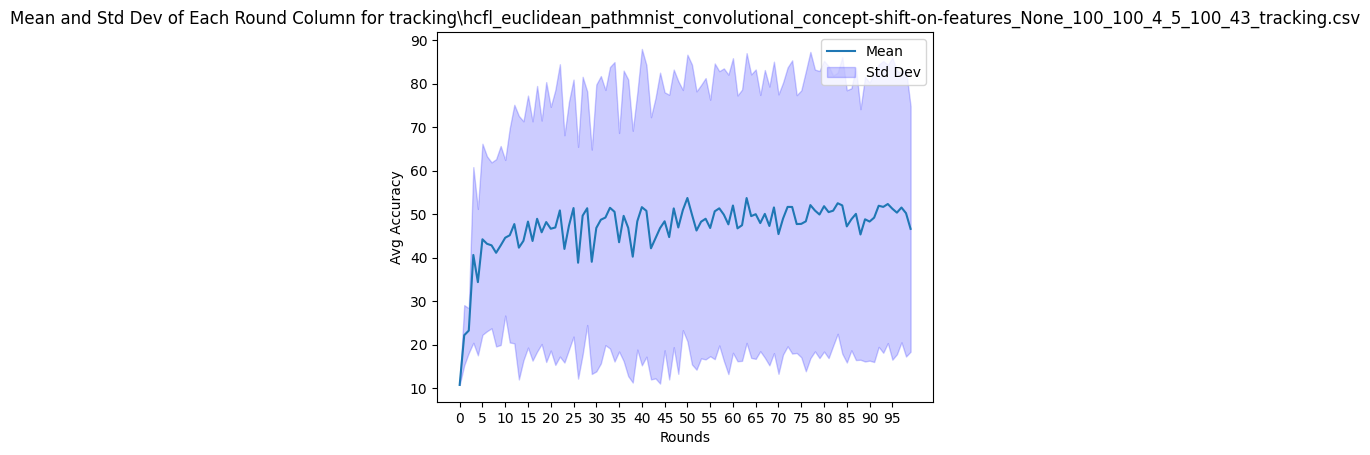

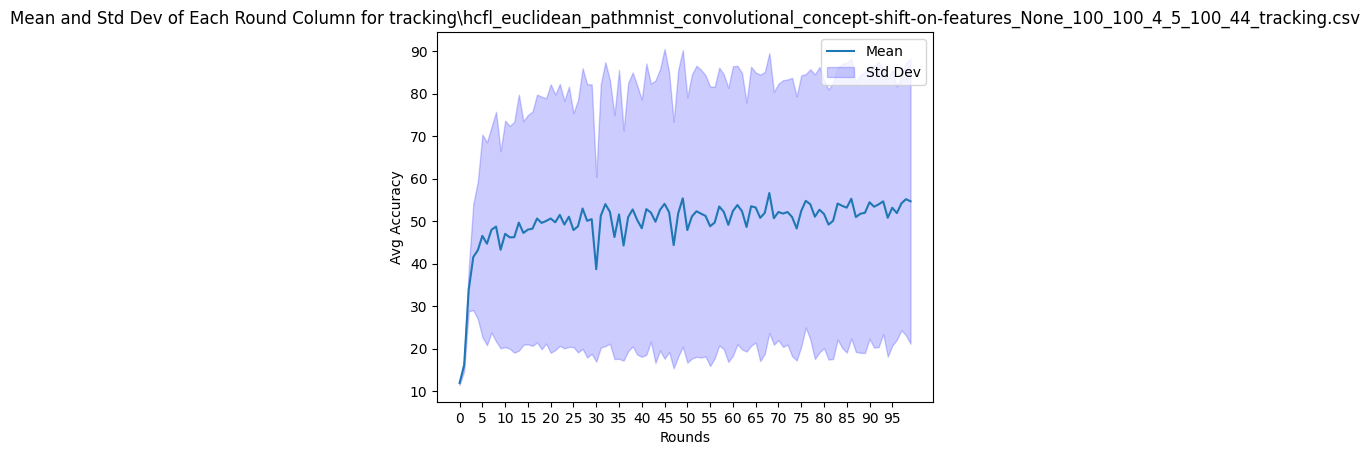

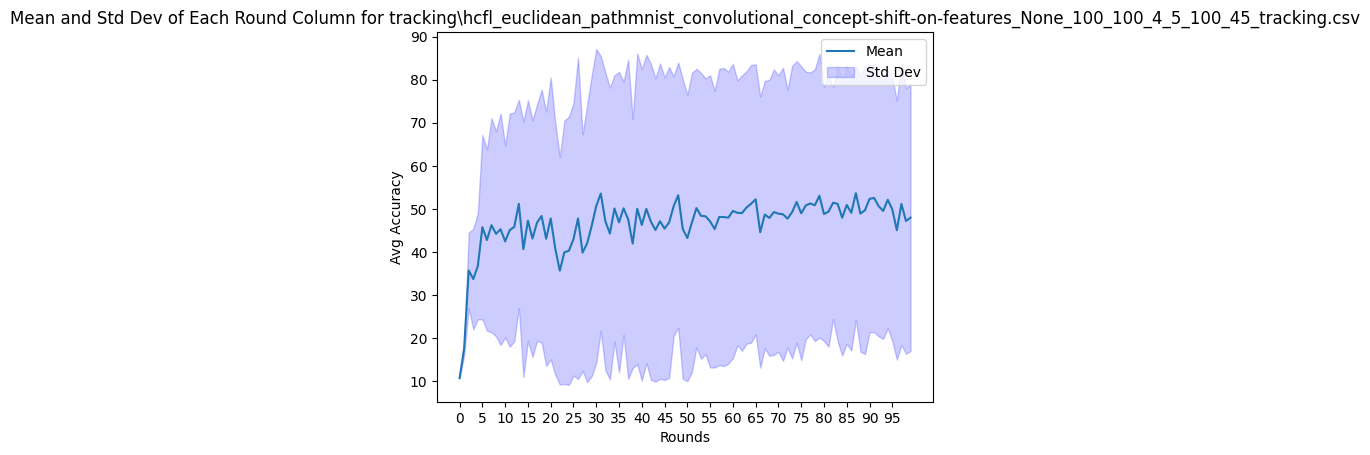

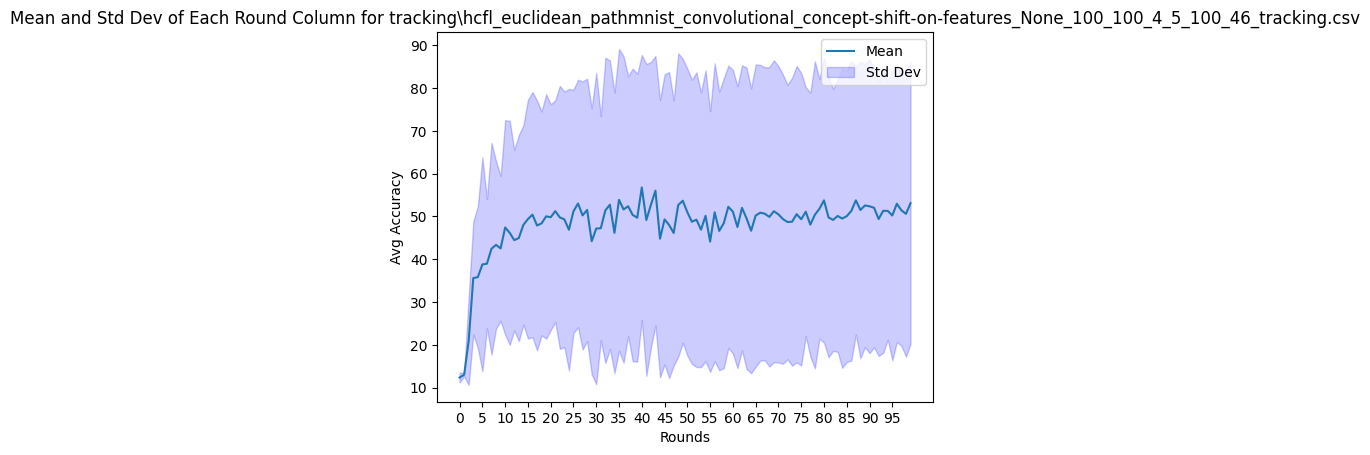

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
# Load all CSV files in the tracking folder
csv_files = glob.glob('tracking/*.csv')

# Read and concatenate all CSV files into a single DataFrame
df_list = [pd.read_csv(file) for file in csv_files]

# Iterate through each dataframe and plot the mean and std of each 'round_' column
for i, (df, file) in enumerate(zip(df_list, csv_files)):
    df_mean = df.mean()
    df_std = df.std()
    round_columns = [col for col in df_mean.index if col.startswith('round_')]
    
    plt.figure()
    plt.plot(np.arange(len(round_columns)),df_mean[round_columns], label='Mean')
    plt.fill_between(range(len(round_columns)), df_mean[round_columns] - df_std[round_columns], df_mean[round_columns] + df_std[round_columns], color='b', alpha=0.2, label='Std Dev')
    plt.xlabel('Rounds')
    plt.ylabel('Avg Accuracy')
    plt.title(f'Mean and Std Dev of Each Round Column for {file}')
    plt.xticks(range(0, 100, 5))  # Set x-axis ticks from 0 to 99 with a step of 5
    plt.legend()
    plt.show()


# Visuals

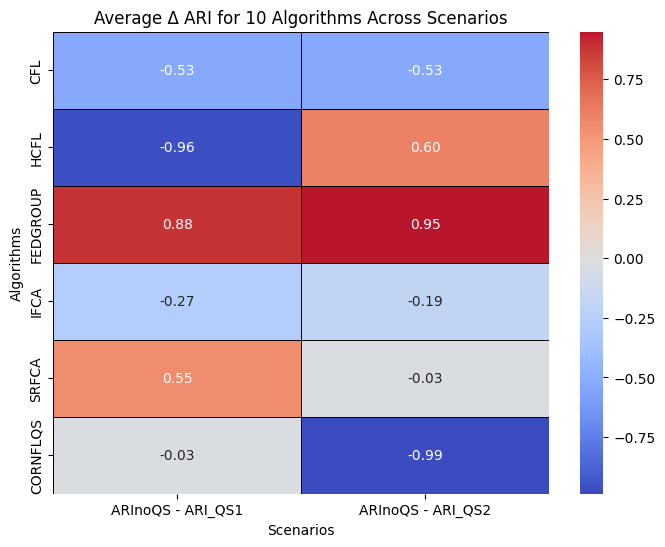

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
algorithms = ['CFL','HCFL','FEDGROUP','IFCA','SRFCA','CORNFLQS']  # 10 algorithms
scenarios = ["ARInoQS - ARI_QS1", "ARInoQS - ARI_QS2"]

# Random data for demonstration (replace with your actual data)
avg_delta_ari = np.random.uniform(-1, 1, (6, 2))  # 10 algorithms x 2 scenarios

# Create a DataFrame
df = pd.DataFrame(avg_delta_ari, index=algorithms, columns=scenarios)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    df,
    annot=True,  # Annotate cells with values
    fmt=".2f",   # Format annotations to 2 decimal places
    cmap="coolwarm",  # Color map: blue for positive, red for negative
    center=0,    # Center the color map at 0
    linewidths=0.5,
    linecolor="black",
)
plt.title("Average Δ ARI for 10 Algorithms Across Scenarios")
plt.xlabel("Scenarios")
plt.ylabel("Algorithms")
plt.show()

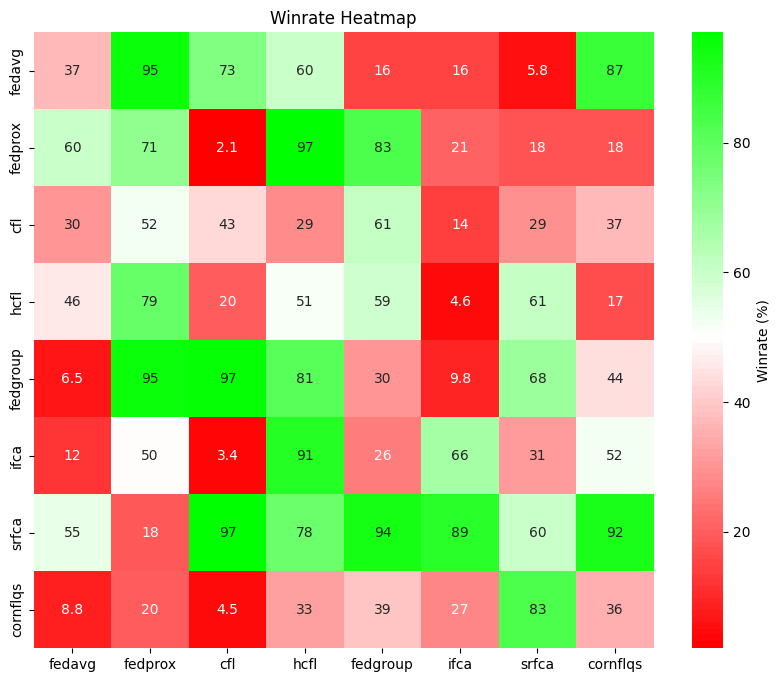

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the list of algorithms
algorithms = ['fedavg', 'fedprox', 'cfl', 'hcfl', 'fedgroup', 'ifca', 'srfca', 'cornflqs']

# Create a random winrate matrix (values between 0 and 1)
np.random.seed(42)  # For reproducibility
winrate_matrix = np.random.rand(len(algorithms), len(algorithms)) * 100  # Scale to 0-100

# Create a DataFrame to display the matrix with algorithm names as both row and column indices
winrate_df = pd.DataFrame(winrate_matrix, index=algorithms, columns=algorithms)

# Create a custom colormap
colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]  # Red, White, Green
n_bins = 100  # Discretize the interpolation into bins
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(winrate_df, annot=True, cmap=cm, center=50, cbar_kws={'label': 'Winrate (%)'})
plt.title('Winrate Heatmap')
plt.show()
